In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
in_data=pd.read_csv('C:\Users\AG28744\Desktop\Projects\Misc\DS_Datasets\insurance-premium-prediction\insurance.csv')
in_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb_make = LabelEncoder()
in_data['sex']=lb_make.fit_transform(in_data['sex'])
in_data['smoker']=lb_make.fit_transform(in_data['smoker'])
in_data['region']=lb_make.fit_transform(in_data['region'])
in_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [53]:
in_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [54]:
x=in_data[in_data.columns[:6]]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [56]:
#sns.distplot(in_data.age)
#sns.distplot(x.sex)
#sns.distplot(x.bmi)
#sns.distplot(x.children)
#sns.distplot(x.smoker)

In [57]:
y = in_data[in_data.columns[6]]
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

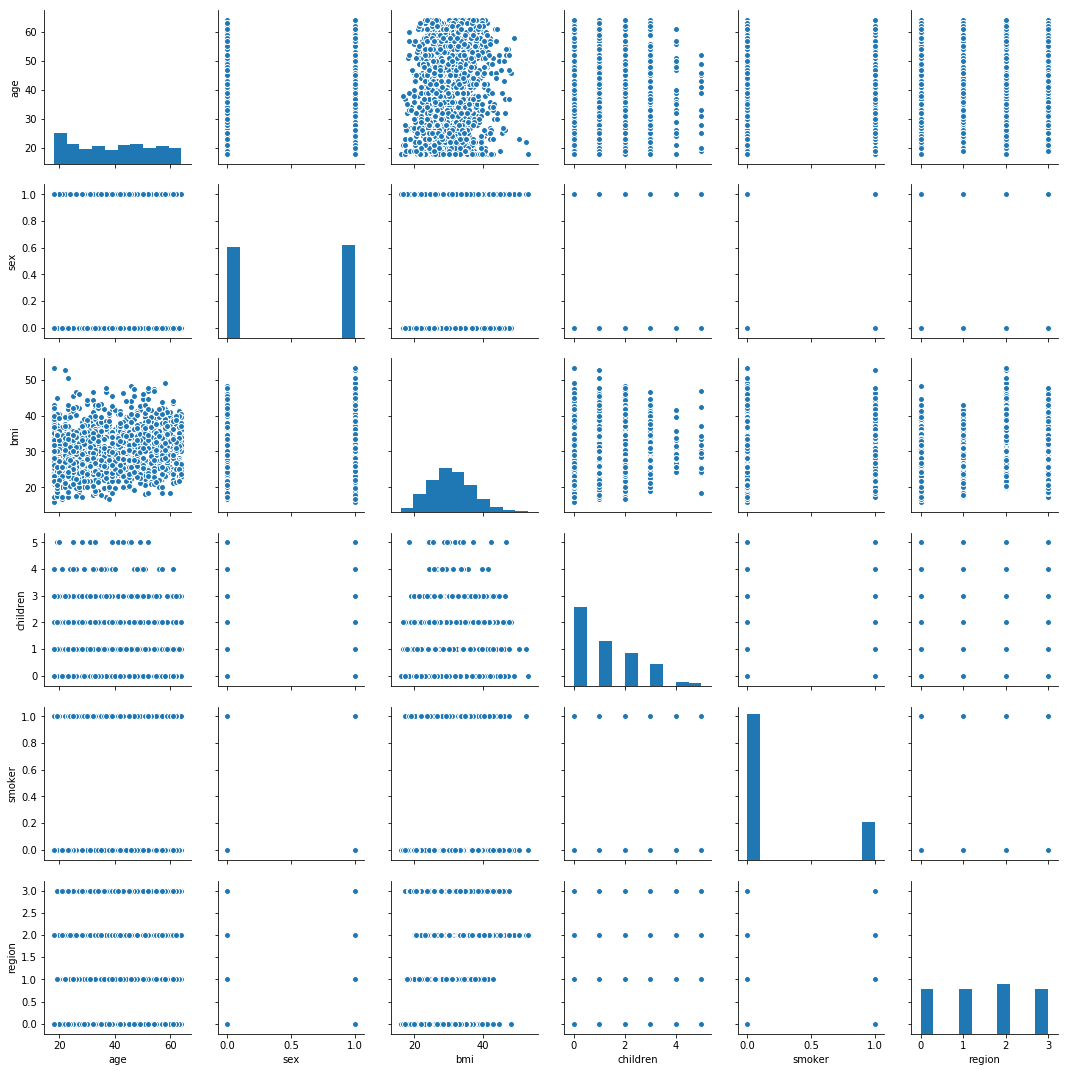

In [58]:
sns.pairplot(x)

In [59]:
in_data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


In [60]:
from sklearn import preprocessing

In [61]:
x_std=preprocessing.scale(x)
x_std=pd.DataFrame(x_std)
x_std.head()

,0,1,2,3,4,5
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915


In [64]:
x_std.skew()

0    0.055673
1   -0.020951
2    0.284593
3    0.938380
4    1.464766
5   -0.038101
dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [108]:
import statsmodels.api as sm

In [109]:
m1=sm.OLS(y_train,X_train).fit()     #MLR model

In [110]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1133.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:53:32   Log-Likelihood:                -9510.7
No. Observations:                 936   AIC:                         1.903e+04
Df Residuals:                     930   BIC:                         1.906e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          205.5338     13.537     15.183      0.000     178.967     232.101
sex         -952.1714    409.270     -2.327      0.020   -1755.371    -148.972
bmi           59.3052     20.966      2.829      0.005      18.159     100.452
children     372.3077    169.566      2.196      0.028      39.530     705.085
smoker      2.366e+04    508.000     46.571      0.000    2.27e+04    2.47e+04
region      -664.3255    186.593     -3.560      0.000   -1030.518    -298.133
==============================================================================
Omnibus:                      173.844   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.310
Skew:                           1.035   Prob(JB):                     3.18e-82
Kurtosis:                       5.310   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
pred=m1.predict(X_test)
pred={'y_pred':pred}
pred=pd.DataFrame(pred)
pred.head()

,y_pred
867,11734.223889
739,29523.253007
241,8465.568039
1209,11753.876954
1128,6360.519909


In [118]:
pred_data={'y':y_test}
pred_data=pd.DataFrame(pred_data)
pred_data['pred']=pred
pred_data.head()

,y,pred
867,11576.13,11734.223889
739,44585.46,29523.253007
241,5354.07,8465.568039
1209,12347.17,11753.876954
1128,14358.36,6360.519909
